# Delta Design
#### Thermal

### Concerns:
* Heat Produced
    * Heat *ONLY* produced by <span style="color:red">RED</span> deltas.
    * Produced at a rate of $q_0 = 160 \dfrac{DTU}{\propto wx}$.
* Heat Conducted
    * Heat conducted to/from adjacent deltas of different temperature.
        * Can be either <span style="color:blue">blue</span> OR <span style="color:red">red</span> deltas.
        * Must share some perimeter.
    * Conducted at a rate of $k_c = 2 \dfrac{DTU}{lyn~~~\propto wx~~~{}^oNn}$.
* Heat Radiation
    * Heat *ONLY* radiated by deltas on the exterior of structure with unblocked vertices.
        * Can be either <span style="color:blue">blue</span> OR <span style="color:red">red</span> deltas.
        * MUST, MUST, MUST have exposed vertice.
    * Radiated at a rate of $k_R = 1 \dfrac{DTU}{lyn~~~\propto wx~~~{}^oNn}$.
* General Notes
    * Avoid placing <span style="color:red">red</span> deltas next to each other, especially if none of them can radiate.
    * Avoid allowing <span style="color:blue">blue</span> deltas to radiate.
    * Never place a <span style="color:red">red</span> delta on the interior of the structure.
    
### Design Specs

|Summary of Design Specifications||
|:--|:--:|
|Functional Internal Area|100 qd|
|Maximum Cool Deltas (% Total)|60-70%|
|Average Internal Temperature Range|55-65 ${}^o$Nn|
|Individual Delta Temperature Range|20-85 ${}^o$Nn|
|Maximum Load at Anchor Points|20 Dn|
|Maximum Internal Moment|40 LD|
|Overhead Factor-K|(varies)|
|**Total Budget**|! 1400.00|

### From Summary Below

|Quantity|Value|Acceptable|Viable?|
|:---|:---:|:---:|:---:|
|$T^*$|52.7059${}^o Nn$|55-65${}^o Nn$|Estimate, N/A|
|$T_{avg,rad}$|56.4052${}^o Nn$|55-65${}^o Nn$|Estimate, N/A|
|$T_{avg}$|61.8479${}^o Nn$|55-65${}^o Nn$|Y|
|$T_{min}$|22.9731${}^o Nn$|20-85${}^o Nn$|Y|
|$T_{max}$|80.5379${}^o Nn$|20-85${}^o Nn$|Y|

In [6]:
# Import DeltaDesignTool (contains all relevant classes and functions) and pandas (used for making pretty tables)
from DeltaDesignTool import *
import pandas as pd

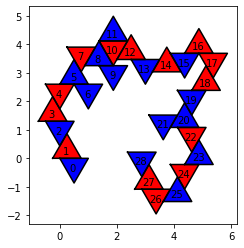

In [38]:
# Build cluster, mark radiating tips, and display cluster
cluster = [Deltoid(0,0,-1,'b'),
           Deltoid(-0.5,0,1,'r'),
           Deltoid(-1,3,-1,'b'),
           Deltoid(-1.5,3,1,'r'),
           Deltoid(-1,6,-1,'r'),
           Deltoid(0,6,1,'b'),
           Deltoid(1,6,-1,'b'),
           Deltoid(0.5,9,-1,'r'),
           Deltoid(1.75,7.5,1,'b'),
           Deltoid(2.75,7.5,-1,'b'),
           Deltoid(2.75,9.5,-1,'r'),
           Deltoid(2.75,9.5,1,'b'),
           Deltoid(4,8,1,'r'),
           Deltoid(5,8,-1,'b'),
           Deltoid(6.25,6.5,1,'r'),
           Deltoid(7.5,8,-1,'b'),
           Deltoid(8.5,8,1,'r'),
           Deltoid(9.5,8,-1,'r'),
           Deltoid(9,5,1,'r'),
           Deltoid(8,5,-1,'b'),
           Deltoid(7.5,2,1,'b'),
           Deltoid(6,3,-1,'b'),
           Deltoid(8,2,-1,'r'),
           Deltoid(8.5,-1,1,'b'),
           Deltoid(7.5,-1,-1,'r'),
           Deltoid(7,-4,1,'b'),
           Deltoid(5.5,-3,-1,'r'),
           Deltoid(4.5,-3,1,'r'),
           Deltoid(4,0,-1,'b')
          ]

tags = "clollooloooccococrrooorrorclo"
mark_radiators(cluster,tags)

# Changes made later in design
for i in range(14,len(cluster)):
    cluster[i].a += 0.25 * 0.5
    cluster[i].b += 0.5 * 0.5*(3/4)**0.5
#for i in range(15,len(cluster)):
    #cluster[i].a += 0.25 * 0.5
    #cluster[i].b += -0.5 * 0.5*(3/4)**0.5
for i in [27,28]:
    cluster[i].a += 0.5 * 0.5

plot_cluster(cluster,indices=True)

In [39]:
# Begin thermal analysis

# Determine estimate for average temperature
radiate_lengths = []
for i in range(len(cluster)):
    radiate_lengths.append(radiative_length(cluster,cluster[i]))
rad_lens = {i:leng for i,leng in zip(list(range(len(cluster))),radiate_lengths)}

avg_len = 0
num_rad = 0
for leng in radiate_lengths:
    if leng > 0:
        avg_len += leng
        num_rad += 1
avg_len /= num_rad



N_R = len(find_red_deltas(cluster))
N_star = num_rad
L_star = avg_len

q_0 = 160
k_R = 1
k_c = 2

T_star = T_avg = (N_R*q_0)/(N_star*L_star*k_R)

print("N_R: {:3}".format(N_R))
print("N*:  {:3}".format(N_star))
print("L*:  {:8.4f} lyn".format(L_star))
print("T*:  {:8.4f} deg Nn".format(T_star))

N_R:  14
N*:   16
L*:    2.6250 lyn
T*:   53.3333 deg Nn


 36.9231,	 10.5495
  0.0000,	 24.6154
 56.6154,	 22.6462
 26.6667,	 28.4444
 21.3333,	 33.7778
 46.6667,	 15.5556
  0.0000,	  0.0000
  0.0000,	 20.0000
 59.0909,	 13.1313
  0.0000,	  0.0000
 32.0000,	 20.3636
 29.0909,	  7.2727
 21.8182,	 27.1515
 45.9487,	 22.9744
  0.0000,	 24.6154
 56.9231,	 22.7692
 22.8571,	 25.7143
 46.6667,	 36.1905
 22.8571,	 34.2857
 26.6667,	 13.3333
 36.9231,	 10.5495
  0.0000,	  0.0000
  0.0000,	 24.6154
 64.6154,	 18.4615
  0.0000,	 40.0000
 60.0000,	 17.1429
 36.9231,	 29.2308
 30.0000,	 33.8462
 24.6154,	 24.6154


,0
T*,53.333333
"T Rad,avg",56.405229
T avg,62.660200
T min,22.972183
T max,81.579949


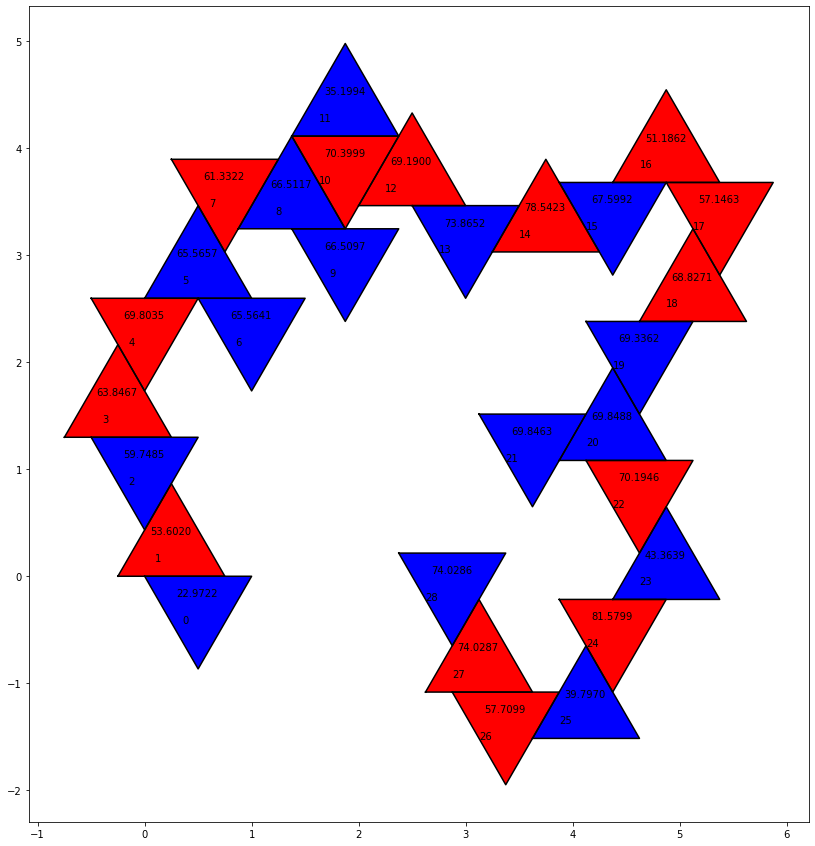

In [74]:
# Use iterative solver to determine temperature in individual deltas, then print summary and plot cluster w/ temps
T_0 = 0
T = []
for delta in cluster:
    T.append(T_0)
T_new = T.copy()

adjacencies = determine_adjacencies(cluster,True)

dt = 1.0e-3
for t in range(int(1.0e5)):
    for delta in cluster:
        i = cluster.index(delta)
        adjacent = adjacencies[i]
        
        q_gen = 0
        if delta.color == 'r':
            q_gen = q_0
            
        l_rad = rad_lens[cluster.index(delta)]
        l_adj = []
        for adj in adjacent:
            l = shared_perimeter(delta,cluster[adj])
            l_adj.append(l)
        T_adj = [T[adj] for adj in adjacent]
        
        S_l = sum(l_adj)
        S_Tl = sum([T_i*l for T_i,l in zip(T_adj,l_adj)])
            
        T_new[i] = (q_gen + k_c*S_Tl) / (k_R*l_rad + k_c*S_l)
        
        if t==1:
            print("{:8.4f},\t{:8.4f}".format(S_Tl,T_new[i]))
        
    diff = [abs(T_new[i]-T[i]) for i in range(len(T))]
    T = T_new.copy()
    
    avg_diff = sum(diff)/len(diff)
    if avg_diff < 1.0e-3:
        # print("Breaking...")
        break

fig,axs = plt.subplots(1,1,figsize=(15,15))
plot_cluster(cluster,axis=axs,indices=True)
for temp in T:
    i = T.index(temp)
    axs.text(cluster[i].center()[0]-0.2,cluster[i].center()[1]+0.1,"{:.4f}".format(temp))
    
df_data = {}
df_data["T*"] = T_star
df_data["T Rad,avg"] = T_rad_avg
df_data["T avg"] = sum(T)/len(T)
df_data["T min"] = min(T)
df_data["T max"] = max(T)
df = pd.DataFrame(data=df_data,index=[0])
df = df.swapaxes(1,0)
df

### Theory for iterative solver

$$q_{gen} = q_{cond} + q_{rad}$$

$$q_{gen,n} = \begin{array}{cc} 0, & color_n = blue \\ 160, & color_n = red \end{array}$$
$$q_{cond,n} = \sum_{i}^{N_{adj}} (k_c L_{n,i} (T_{n,new} - T_{i,curr}))$$
$$q_{rad,n} = k_R L_{rad,n} T_{n,new}$$

$$q_{gen,n} = q_{cond,n} + q_{rad,n}$$
$$q_{gen,n} = \sum_{i}^{N_{adj}} (k_c L_{n,i} (T_{n,new} - T_{i,curr})) + k_R L_{rad,n} T_{n,new}$$

$$T_{n,new} = \dfrac{q_{gen,n} + k_c \sum_{i}^{N_{adj}} L_{n,i} T_{i,curr}}{k_R L_{rad,n} + k_c \sum_{i}^{N_{adj}} L_{n,i}},~~~q_{gen,n} = \begin{array}{cc} 0, & color_n = blue \\ 160, & color_n = red \end{array}$$

In [65]:
spreadsheetDF_data = []
for i in range(len(cluster)):
    spreadsheetDF_data.append({})
for i in range(len(cluster)):
    index = i
    delta_color = cluster[i].color
    rad_len = rad_lens[i]
    i_adj = adjacencies[i].copy()
    sp_adj = []
    for j in i_adj:
        l = shared_perimeter(cluster[i],cluster[j])
        sp_adj.append(l)
        
    spreadsheetDF_data[i]["color"] = delta_color
    spreadsheetDF_data[i]["rad len"] = rad_len
    for j in range(3):
        val = 0
        if j < len(sp_adj):
            val = sp_adj[j]
        spreadsheetDF_data[i]["sp{}".format(j+1)] = val
    for j in range(3):
        val = -1
        if j < len(i_adj):
            val = i_adj[j]
        spreadsheetDF_data[i]["i{}".format(j+1)] = val
spreadsheetDF = pd.DataFrame(data=spreadsheetDF_data)
spreadsheetDF

,color,rad len,sp1,sp2,sp3,i1,i2,i3
0,b,4.0,1.5,0.0,0.0,1,-1,-1
1,r,1.5,1.5,1.0,0.0,0,2,-1
2,b,0.0,1.0,1.5,0.0,1,3,-1
3,r,2.5,1.5,1.0,0.0,2,4,-1
4,r,2.0,1.0,1.0,0.0,3,5,6
5,b,0.0,1.0,1.0,1.0,4,6,7
6,b,0.0,0.0,1.0,0.0,4,5,-1
7,r,3.0,1.0,1.5,0.0,5,8,-1
8,b,0.0,1.5,1.0,2.0,7,9,10
9,b,0.0,1.0,0.0,0.0,8,10,-1
